# Draw JPEG image in Excel Spreadsheet with Python
### Here is how I resize(pixelate) a JPEG image file and draw in Excel spreadsheet. 

## Import libraries

I used **Pillow(PIL)** library to process image file.    
https://pillow.readthedocs.io/en/latest/index.html

Also used **openpyxl** library to create and handle Excel file.    
https://openpyxl.readthedocs.io/en/stable/

In [1]:
# to resize(pixelate) image and get pixel values
from PIL import Image

# to handle excel file 
import openpyxl

# to draw image in this notebook
import numpy as np
import matplotlib.pyplot as plt

## Load original image

Load original JPEG image **"santa_clara.jpg"**.

The picture was taken by myself when I visited Mission Santa Clara de Asís in California, USA in November 2017.
https://en.wikipedia.org/wiki/Mission_Santa_Clara_de_As%C3%ADs

In [2]:
img = Image.open("./images/santa_clara.jpg")

Get the size of img object.

In [3]:
print(img.size)

(4032, 3024)


Here is how original image looks like.

Text(0.5,1,'Original Image: (4032, 3024)')

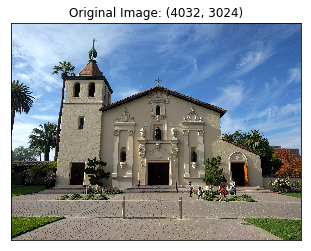

In [4]:
plt.tick_params(labelbottom=False,labelleft=False,bottom=False,left=False) #remove ticks and labels
plt.imshow(np.array(img))
plt.title("Original Image: " + str(img.size)) #show size on top

## Resize (pixelate) the image

By using **resize()** method, resize the original image down to 1/20.   
Since number of pixel is reduced, filter is applied to get new pixel values.   
In this case, I used **"BOX"** filter.   
(https://pillow.readthedocs.io/en/latest/handbook/concepts.html#concept-filters)

In [5]:
img_small = img.resize([img.width//20, img.height//20], Image.BOX)

Show the size of resized image.

In [6]:
print(img_small.size)

(201, 151)


Here is how resized image looks like.

Text(0.5,1,'Resized Image: (201, 151)')

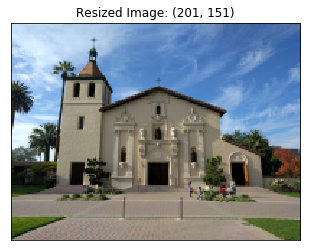

In [7]:
plt.tick_params(labelbottom=False,labelleft=False,bottom=False,left=False) #remove ticks and labels
plt.imshow(np.array(img_small))
plt.title("Resized Image: " + str(img_small.size)) #show size on top

Pixel values [R,G,B] can be shown as numpy array.

In [8]:
print(np.array(img_small))

[[[203 225 248]
  [204 224 248]
  [205 225 249]
  ...
  [ 73 107 161]
  [ 76 109 163]
  [ 81 112 166]]

 [[203 225 247]
  [203 224 248]
  [203 224 248]
  ...
  [ 79 112 166]
  [ 81 114 167]
  [ 82 114 167]]

 [[204 226 248]
  [203 225 248]
  [203 224 248]
  ...
  [ 81 114 167]
  [ 79 111 165]
  [ 84 115 169]]

 ...

 [[ 37  48  24]
  [ 16  25  12]
  [  9  15  10]
  ...
  [ 62  87  31]
  [ 69  94  37]
  [ 62  85  33]]

 [[ 13  18  16]
  [ 41  46  44]
  [ 89  91  84]
  ...
  [ 65  92  36]
  [ 72  96  40]
  [ 72  98  42]]

 [[122 120 106]
  [142 139 123]
  [151 146 129]
  ...
  [ 67  95  41]
  [ 63  88  42]
  [ 60  88  36]]]


Also, **getpixel()** method returns the value for the specific coordinate (x,y).

In [9]:
print(img_small.getpixel((0,0)))
print(img_small.getpixel((0,1)))

(203, 225, 248)
(203, 225, 247)


## Draw the resized image in Excel Spreadsheet.

**openpyxl** takes the Hex color code to color the cell background.    
So, RGB values need to be converted.   

In [10]:
rgb = img_small.getpixel((0,0))

color_string = "".join([str(hex(i))[2:].upper().rjust(2, "0") for i in rgb])

print(rgb, "->", color_string)

(203, 225, 248) -> CBE1F8


By using **openpyxl**, create a new Excel file, which has a worksheet "image".

In [11]:
wb = openpyxl.Workbook()
ws = wb.active      
ws.title = "image"

Color cells by using **PatternFill** module.

In [12]:
from openpyxl.styles import PatternFill                                                    

width, height = img_small.size

for y in range(height):
    for x in range(width):
        rgb = img_small.getpixel((x,y))
        cell = ws.cell(row = y+1, column = x+1)
        
        color_string = "".join([str(hex(i))[2:].upper().rjust(2, "0") for i in rgb])
        
        cell.fill = PatternFill(patternType='solid', fgColor=color_string)

Make cell shape to square so that each cell represents each pixcel and draw the image correctly.    
Column letter (A,B,C....) can be obtained by **get_column_letter()** method.    
(Note: row height is set as points and column width is set as number of character.)

In [13]:
from openpyxl.utils import get_column_letter

for i in range(height):
    ws.row_dimensions[i+1].height = 2.5

for i in range(width):
    ws.column_dimensions[get_column_letter(i+1)].width = 0.5


Save the Excel file as **"sample.xlsx"**.    
(It will overwrite the file if it already exists.)

In [14]:
wb.save("sample.xlsx")

Here is how it looks like in Excel Spreadsheet.    

<img src="https://raw.githubusercontent.com/so1979/python_projects/master/images/excel_screenshot.PNG">